In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
 
import nengo
from nengo.dists import Choice
from nengo.utils.ensemble import tuning_curves
from nengo.utils.matplotlib import rasterplot
from nengo.processes import WhiteSignal

In [2]:
def input_one_hot(t):
    if(t % 1 == 0):
        return 1
    else:
        return 0

In [6]:
model = nengo.Network()
with model:
    input_node = nengo.Node(output=input_one_hot)
    pre_neuron = nengo.Ensemble(1, dimensions=1, max_rates = [100] * 1, intercepts=[0] * 1)
    pre_neuron.encoders = Choice([[1]])
    nengo.Connection(input_node, pre_neuron)
 
    
    noise = nengo.Node(WhiteSignal(50, high=10), size_out=1)
    noise_neuron = nengo.Ensemble(1, dimensions=1, max_rates = [100] * 1, intercepts=[0] * 1)
    noise_neuron.encoders = Choice([[1]])
    
    nengo.Connection(noise, noise_neuron)
    
    post_neuron = nengo.Ensemble(1, dimensions=1, max_rates = [100] * 1, intercepts=[0] * 1)
    post_neuron.encoders = Choice([[1]])
    
    error = nengo.Ensemble(1, dimensions=1)
        
    nengo.Connection(pre_neuron, post_neuron, transform=1)
    conn = nengo.Connection(noise_neuron, post_neuron, function=lambda x: np.random.random(1))
    conn = nengo.Connection(noise_neuron, post_neuron, transform=1)
    
    nengo.Connection(post_neuron, error)
    nengo.Connection(pre_neuron, error, transform=-1)
    
    conn.learning_rule_type = nengo.PES(learning_rate=0.001)
    
    nengo.Connection(error, conn.learning_rule)
    
    input_p = nengo.Probe(input_node)
    noise_p = nengo.Probe(noise)
    error_p = nengo.Probe(error)
    pre_p = nengo.Probe(pre_neuron)
    post_p = nengo.Probe(post_neuron)
    noise_spike_p = nengo.Probe(noise_neuron.neurons)
    pre_spike_p = nengo.Probe(pre_neuron.neurons)
    post_spike_p = nengo.Probe(post_neuron.neurons)

In [14]:
model = nengo.Network()
with model:
    input_node = nengo.Node(output=input_one_hot)
    pre_neuron = nengo.Ensemble(1, dimensions=1, max_rates = [100] * 1, intercepts=[0] * 1)
    pre_neuron.encoders = Choice([[1]])
    nengo.Connection(input_node, pre_neuron)
 
    
    noise = nengo.Node(WhiteSignal(50, high=10), size_out=1)
    noise_neuron = nengo.Ensemble(1, dimensions=1, max_rates = [100] * 1, intercepts=[0] * 1)
    noise_neuron.encoders = Choice([[1]])
    nengo.Connection(noise, noise_neuron)
    
    post_neuron = nengo.Ensemble(1, dimensions=1, max_rates = [100] * 1, intercepts=[0] * 1)
    post_neuron.encoders = Choice([[1]])
    
    error = nengo.Ensemble(1, dimensions=1)
    
 
    nengo.Connection(pre_neuron, post_neuron, transform=1)
    conn = nengo.Connection(noise_neuron, post_neuron, transform=1)
    
    nengo.Connection(post_neuron, error)
    nengo.Connection(pre_neuron, error, transform=-1)
    
    conn.learning_rule_type = nengo.PES(learning_rate=0.001)
    
    nengo.Connection(error, conn.learning_rule)
    
    input_p = nengo.Probe(input_node)
    noise_p = nengo.Probe(noise)
    error_p = nengo.Probe(error)
    pre_p = nengo.Probe(pre_neuron)
    post_p = nengo.Probe(post_neuron)
    noise_spike_p = nengo.Probe(noise_neuron.neurons)
    pre_spike_p = nengo.Probe(pre_neuron.neurons)
    post_spike_p = nengo.Probe(post_neuron.neurons)

In [15]:
with nengo.Simulator(model) as sim:
    sim.run(10.0)

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

(0, 10)

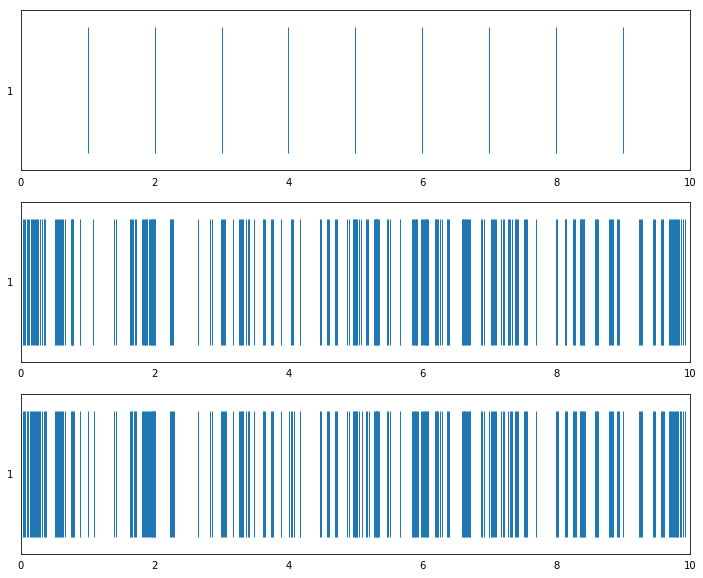

In [16]:
plt.figure(figsize=(12, 10))
plt.subplot(3, 1, 1)
rasterplot(sim.trange(), sim.data[pre_spike_p])
plt.xlim(0, 10)
plt.subplot(3, 1, 2)
rasterplot(sim.trange(), sim.data[noise_spike_p])
plt.xlim(0, 10)
plt.subplot(3, 1, 3)
rasterplot(sim.trange(), sim.data[post_spike_p])
plt.xlim(0, 10)
